In [1]:
import torch
print(torch.cuda.is_available())  # Should print True
print(torch.cuda.get_device_name(0))  # Prints GPU name


True
NVIDIA GeForce GTX 1650


In [2]:
import pandas as pd
import numpy as np
import torch
import requests
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from datetime import datetime
import os

# Set device for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
# Step 2: Load the dataset
df = pd.read_csv("Crop_recommendation.csv")

# Step 3: Separate features and target
X = df.drop('label', axis=1)     # Features: N, P, K, temperature, humidity, ph, rainfall
y = df['label'] 

In [5]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Optional: View class labels
print("Crop classes:", label_encoder.classes_)

Crop classes: ['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']


In [6]:
# Step 5: Normalize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Step 6: Split into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [8]:
# Step 7: Output shapes for confirmation
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("Number of crop classes:", len(label_encoder.classes_))

X_train shape: (1760, 7)
X_test shape: (440, 7)
y_train shape: (1760,)
y_test shape: (440,)
Number of crop classes: 22


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

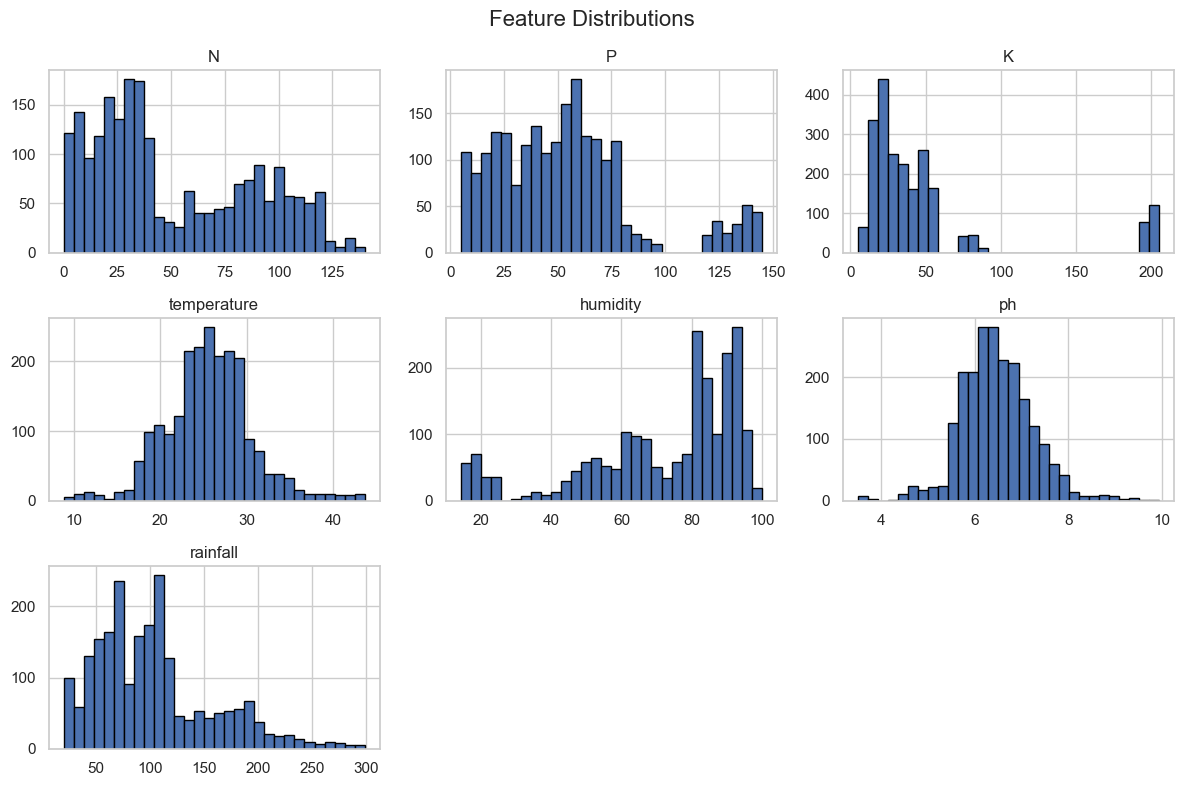

In [10]:
# 1. Histogram of numerical features
df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

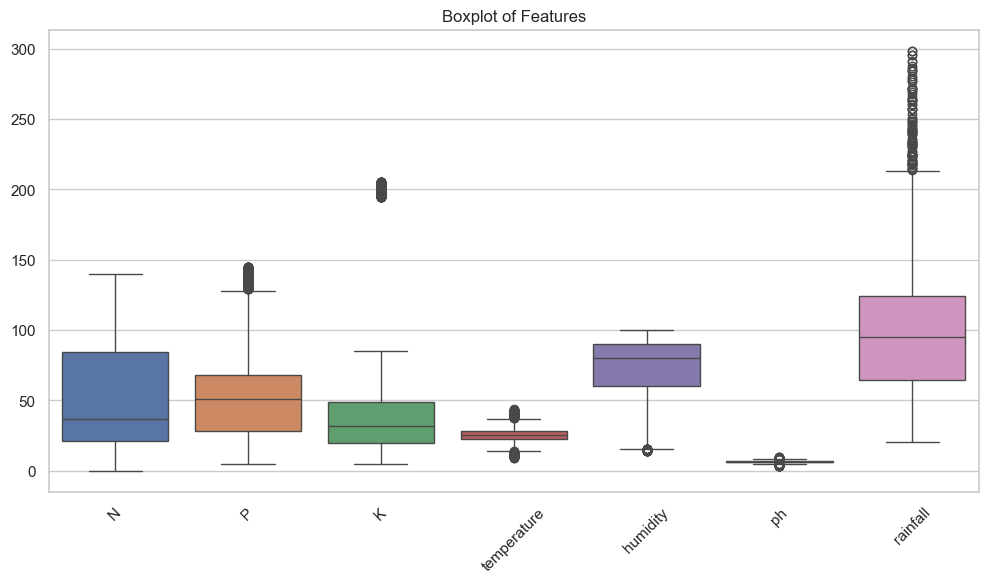

In [11]:
# 2. Boxplot for outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop("label", axis=1))
plt.title("Boxplot of Features")
plt.xticks(rotation=45)
plt.show()

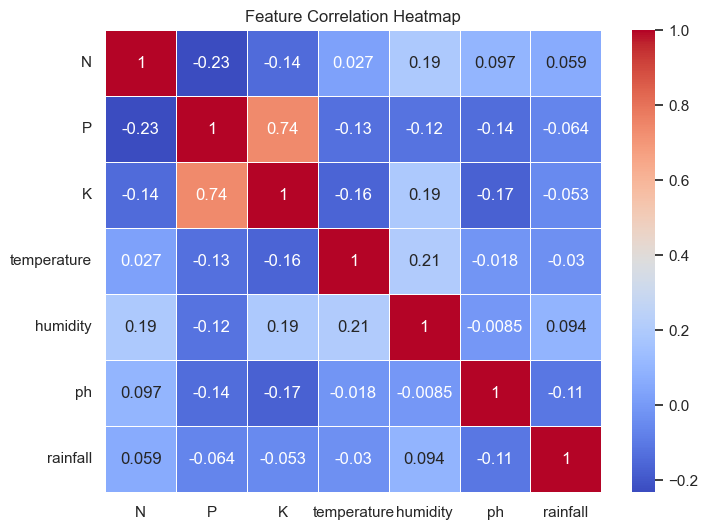

In [12]:
plt.figure(figsize=(8, 6))
corr = df.drop("label", axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

RANDOM FOREST CLASSIFIER 

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
y_pred = rf_model.predict(X_test)

In [15]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Accuracy: {accuracy:.4f}\n")
print("📄 Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


✅ Accuracy: 0.9955

📄 Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00  

C:\Users\mohit\AppData\Local\Temp\ipykernel_14200\1352199525.py:15: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
m:\DL\.conda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


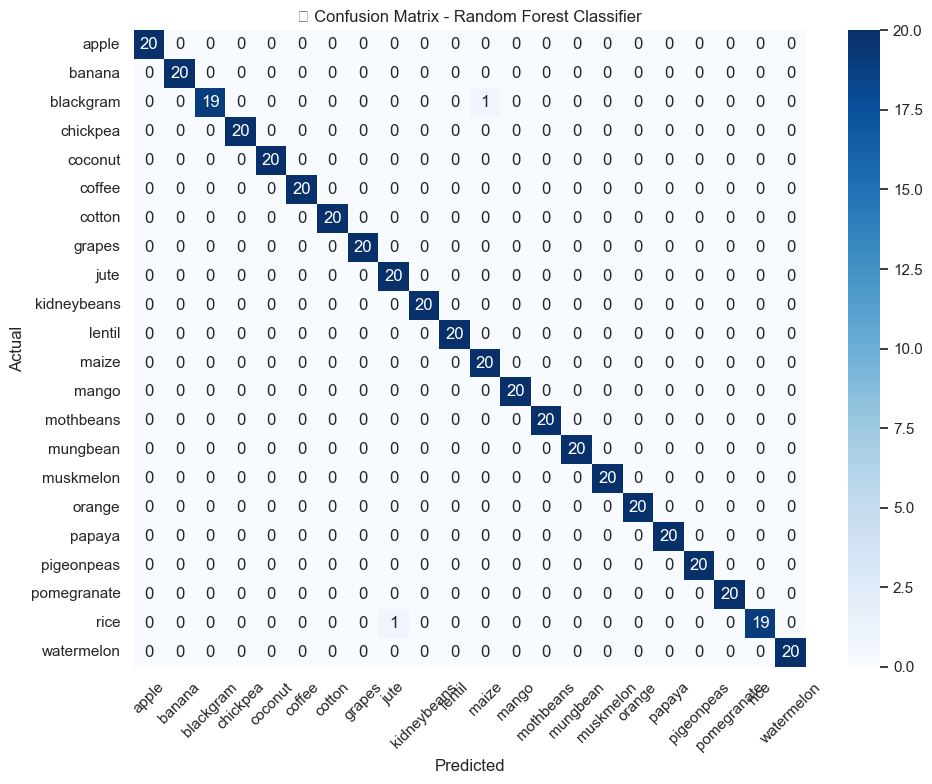

In [16]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_,
            cmap='Blues')
plt.title("🔍 Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

C:\Users\mohit\AppData\Local\Temp\ipykernel_14200\245824523.py:11: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  plt.tight_layout()
m:\DL\.conda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


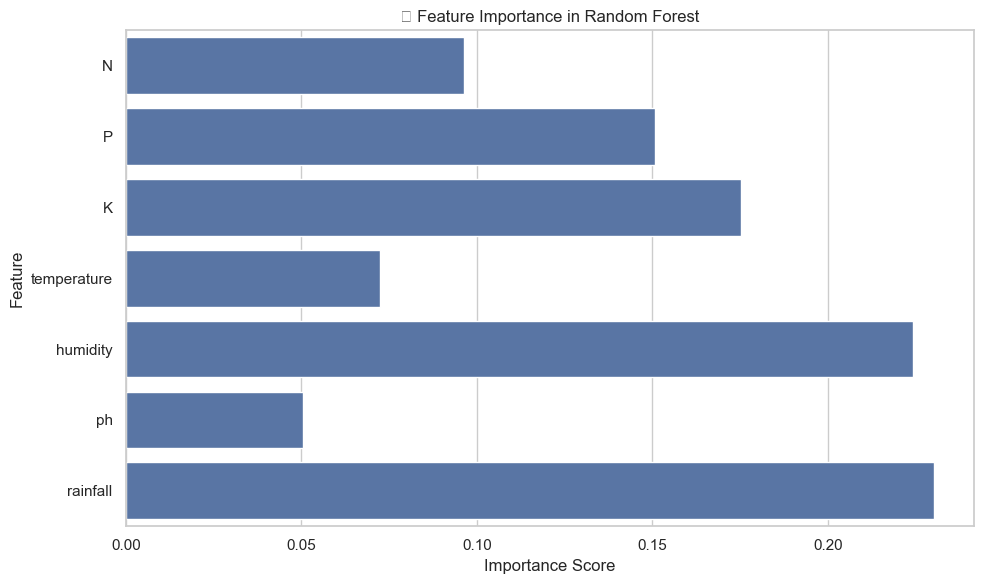

In [17]:
# Feature Importance Plot
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.title("🌾 Feature Importance in Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

RNN

In [18]:
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
X_reshaped = X_scaled.reshape(-1, 7, 1)
# Convert to tensors
X_tensor = torch.tensor(X_reshaped, dtype=torch.float32)
y_tensor = torch.tensor(y_encoded, dtype=torch.long)
X_train, X_test, y_train, y_test = train_test_split(
    X_tensor, y_tensor, test_size=0.2, random_state=42, stratify=y_encoded
)

In [19]:
# Create Dataloaders
train_ds = TensorDataset(X_train, y_train)
test_ds = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=32)

In [20]:
# Define LSTM Classifier
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMClassifier, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        _, (h_n, _) = self.lstm(x)
        out = self.fc(h_n[-1])
        return out

In [21]:
# Model parameters
input_size = 1
hidden_size = 64
num_layers = 1
num_classes = len(label_encoder.classes_)

In [22]:
model = LSTMClassifier(input_size, hidden_size, num_layers, num_classes).to(device)

In [23]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [24]:
# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [1/50], Loss: 3.0066
Epoch [2/50], Loss: 2.1064
Epoch [3/50], Loss: 1.5290
Epoch [4/50], Loss: 1.3028
Epoch [5/50], Loss: 1.2459
Epoch [6/50], Loss: 1.0166
Epoch [7/50], Loss: 1.0096
Epoch [8/50], Loss: 0.8924
Epoch [9/50], Loss: 0.7502
Epoch [10/50], Loss: 0.6575
Epoch [11/50], Loss: 0.6832
Epoch [12/50], Loss: 0.4355
Epoch [13/50], Loss: 0.5455
Epoch [14/50], Loss: 0.4108
Epoch [15/50], Loss: 0.4176
Epoch [16/50], Loss: 0.3639
Epoch [17/50], Loss: 0.4839
Epoch [18/50], Loss: 0.3121
Epoch [19/50], Loss: 0.4316
Epoch [20/50], Loss: 0.2828
Epoch [21/50], Loss: 0.4199
Epoch [22/50], Loss: 0.2871
Epoch [23/50], Loss: 0.2476
Epoch [24/50], Loss: 0.2719
Epoch [25/50], Loss: 0.2049
Epoch [26/50], Loss: 0.1428
Epoch [27/50], Loss: 0.2605
Epoch [28/50], Loss: 0.1199
Epoch [29/50], Loss: 0.1415
Epoch [30/50], Loss: 0.1175
Epoch [31/50], Loss: 0.0663
Epoch [32/50], Loss: 0.0995
Epoch [33/50], Loss: 0.1176
Epoch [34/50], Loss: 0.0810
Epoch [35/50], Loss: 0.1046
Epoch [36/50], Loss: 0.0954
E

In [25]:
#Evaluation
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        outputs = model(batch_X)
        _, predicted = torch.max(outputs.data, 1)
        total += batch_y.size(0)
        correct += (predicted == batch_y).sum().item()

print(f"\n✅ LSTM Test Accuracy: {100 * correct / total:.2f}%")


✅ LSTM Test Accuracy: 96.82%


📄 Classification Report (LSTM):
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       0.86      0.90      0.88        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       0.95      1.00      0.98        20
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        20
        jute       1.00      0.95      0.97        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      0.70      0.82        20
       maize       1.00      0.90      0.95        20
       mango       0.95      0.95      0.95        20
   mothbeans       0.76      0.95      0.84        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00      

C:\Users\mohit\AppData\Local\Temp\ipykernel_14200\2052679655.py:39: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
m:\DL\.conda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


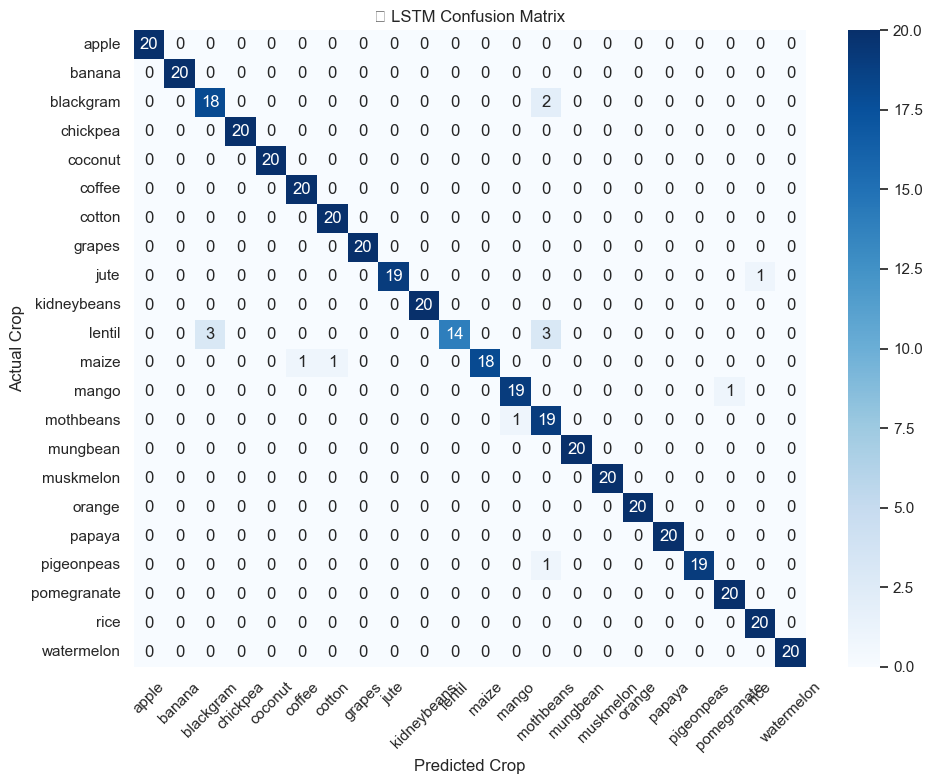

In [26]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import torch

# Switch model to evaluation mode
model.eval()

# Store predictions and labels
all_preds = []
all_labels = []

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        outputs = model(batch_X)
        _, predicted = torch.max(outputs, 1)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(batch_y.cpu().numpy())

# Generate classification report
print("📄 Classification Report (LSTM):")
print(classification_report(all_labels, all_preds, target_names=label_encoder.classes_))

# Generate confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("📊 LSTM Confusion Matrix")
plt.xlabel("Predicted Crop")
plt.ylabel("Actual Crop")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [27]:
import torch

def recommend_crop_lstm(model, scaler, label_encoder, input_data, device='cuda'):
    """
    Recommend a crop using the trained LSTM model on GPU.
    
    input_data: list or array of 7 values [N, P, K, temperature, humidity, ph, rainfall]
    """
    # Normalize and reshape input
    input_scaled = scaler.transform([input_data])
    input_sequence = torch.tensor(input_scaled.reshape(1, 7, 1), dtype=torch.float32).to(device)
    
    # Predict
    model.eval()
    with torch.no_grad():
        output = model(input_sequence)
        _, predicted = torch.max(output, 1)
    
    crop = label_encoder.inverse_transform([predicted.cpu().item()])[0]
    return crop

# 🔍 Example usage:
input_example = [90, 40, 40, 24.5, 80, 6.5, 200]  # Replace with actual inputs
recommended_crop_lstm = recommend_crop_lstm(model, scaler, label_encoder, input_example, device=device)
print("✅ Recommended Crop (LSTM):", recommended_crop_lstm)

✅ Recommended Crop (LSTM): rice


m:\DL\.conda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [29]:
import joblib
import torch

# Save Random Forest model, scaler, and label encoder
joblib.dump(rf_model, 'model/rf_model.pkl')
joblib.dump(scaler, 'model/scaler.pkl')
joblib.dump(label_encoder, 'model/label_encoder.pkl')

# Save LSTM PyTorch model
torch.save(model.state_dict(), 'model/lstm_model.pth')


In [33]:
import requests

url = 'http://127.0.0.1:5000/predict'
data = {
    "N": 90,
    "P": 40,
    "K": 40,
    "temperature": 24.5,
    "humidity": 80,
    "ph": 6.5,
    "rainfall": 200,
    "model": "lstm"  # or "rf"
}

response = requests.post(url, json=data)
print(response.json())


ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=5000): Max retries exceeded with url: /predict (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001A069F468D0>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))